## Flight Price Prediction

Life cycle of Machine learning Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

## Problem Statement
How the price of the flight is affected by the other variables such as Airline, Source and destination locations, number of transit, flight durations, how many hours before departure and date and month of the year

## Data Collection
- Data Source - https://www.kaggle.com/datasets/viveksharmar/flight-price-data
- The data set consist of 10683 rows and 14 columns

### Import Data and Required Packages

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import CSV Data as Panda DataFrame

In [3]:
df = pd.read_csv('data/flight_dataset.csv')

In [4]:
df

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,2019,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,2019,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,2019,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,2019,11,30,14,10,2,40


### Shape of dataset

In [5]:
df.shape

(10683, 14)

### Dataset Information

- Airlines: Names of the airlines operating the flights.
- Source and Destination: Cities where flights originate and land.
- Total Stops: Number of stops made by the flights.
- Price: Ticket prices for the respective flights.
- Date, Month, and Year: Specific dates on which the flights are scheduled.
- Departure and Arrival Times: Detailed hours and minutes for both departure and arrival.
- Duration: Total duration of flights in hours and minutes.

## Data Checks

### Check Missing Values

In [6]:
df.isna().sum()

Airline           0
Source            0
Destination       0
Total_Stops       0
Price             0
Date              0
Month             0
Year              0
Dep_hours         0
Dep_min           0
Arrival_hours     0
Arrival_min       0
Duration_hours    0
Duration_min      0
dtype: int64

### Check for duplicates

In [7]:
df.duplicated().sum()

np.int64(222)

### Drop duplicates

In [8]:
df = df.drop_duplicates(keep='first')

In [9]:
df.shape

(10461, 14)

### Check data type and null data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10461 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10461 non-null  object
 1   Source          10461 non-null  object
 2   Destination     10461 non-null  object
 3   Total_Stops     10461 non-null  int64 
 4   Price           10461 non-null  int64 
 5   Date            10461 non-null  int64 
 6   Month           10461 non-null  int64 
 7   Year            10461 non-null  int64 
 8   Dep_hours       10461 non-null  int64 
 9   Dep_min         10461 non-null  int64 
 10  Arrival_hours   10461 non-null  int64 
 11  Arrival_min     10461 non-null  int64 
 12  Duration_hours  10461 non-null  int64 
 13  Duration_min    10461 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 1.2+ MB


## Feature Engineering

#### Converting Date Month Year to Date format

In [11]:
df = df.rename(columns={'Date': 'Day'})
df['Flight_date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df = df.drop(columns=['Year','Month','Day'])

#### Adding route column

In [77]:
df["routes"] = df["Source"] + "->" + df["Destination"]

In [78]:
df

,Airline,Source,Destination,Total_Stops,Price,Flight_date,Duration,Departure,Arrival,routes
0,IndiGo,Banglore,New Delhi,0,3897,2019-03-24,2.83,22.33,1.17,Banglore->New Delhi
1,Air India,Kolkata,Banglore,2,7662,2019-05-01,7.42,5.83,13.25,Kolkata->Banglore
2,Jet Airways,Delhi,Cochin,2,13882,2019-06-09,19.00,9.42,4.42,Delhi->Cochin
3,IndiGo,Kolkata,Banglore,1,6218,2019-05-12,5.42,18.08,23.50,Kolkata->Banglore
4,IndiGo,Banglore,New Delhi,1,13302,2019-03-01,4.75,16.83,21.58,Banglore->New Delhi
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,2019-04-09,2.50,19.92,22.42,Kolkata->Banglore
10679,Air India,Kolkata,Banglore,0,4145,2019-04-27,2.58,20.75,23.33,Kolkata->Banglore
10680,Jet Airways,Banglore,Delhi,0,7229,2019-04-27,3.00,8.33,11.33,Banglore->Delhi
10681,Vistara,Banglore,New Delhi,0,12648,2019-03-01,2.67,11.50,14.17,Banglore->New Delhi


In [14]:
# Convert minutes to fraction of hours
df['Duration'] = df['Duration_hours'] + (df['Duration_min']/ 60).round(2)
df = df.drop(columns=['Duration_hours','Duration_min'])

df['Departure'] = df['Dep_hours'] + (df['Dep_min']/60).round(2)
df = df.drop(columns=['Dep_hours','Dep_min'])

df['Arrival'] = df['Arrival_hours'] + (df['Arrival_min']/ 60).round(2)
df = df.drop(columns=['Arrival_hours','Arrival_min'])

In [16]:
df.nunique()

Airline          12
Source            5
Destination       6
Total_Stops       5
Price          1870
Flight_date      40
Duration        367
Departure       222
Arrival         223
dtype: int64

In [21]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
df.info()
numeric_columns.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 10461 entries, 0 to 10682
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Airline      10461 non-null  object        
 1   Source       10461 non-null  object        
 2   Destination  10461 non-null  object        
 3   Total_Stops  10461 non-null  int64         
 4   Price        10461 non-null  int64         
 5   Flight_date  10461 non-null  datetime64[ns]
 6   Duration     10461 non-null  float64       
 7   Departure    10461 non-null  float64       
 8   Arrival      10461 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 817.3+ KB


,Total_Stops,Price,Duration,Departure,Arrival
count,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000
mean,0.802505,9027.212504,10.499338,12.883285,13.801548
std,0.660550,4624.861032,8.345339,5.729969,6.816862
min,0.000000,1759.000000,1.250000,0.330000,0.080000
25%,0.000000,5224.000000,2.830000,8.000000,8.830000
50%,1.000000,8266.000000,8.420000,11.750000,14.080000
75%,1.000000,12346.000000,15.170000,18.000000,19.250000
max,4.000000,79512.000000,47.670000,23.920000,23.920000


### Insights
- Cheapest Flight was 1759 and the most expensive was 79512


In [53]:
summary_df = df.groupby('Airline')['Price'].agg(['mean', 'min', 'max']).reset_index()

summary_df
 

,Airline,mean,min,max
0,Air Asia,5593.745283,3383,13774
1,Air India,9555.382891,2050,31945
2,GoAir,5861.056701,3398,22794
3,IndiGo,5668.469897,2227,22153
4,Jet Airways,11599.021081,1840,54826
5,Jet Airways Business,58358.666667,46490,79512
6,Multiple carriers,10902.678094,5797,36983
7,Multiple carriers Premium economy,11418.846154,9845,14629
8,SpiceJet,4335.841718,1759,23267
9,Trujet,4140.000000,4140,4140


### Insights
- The cheapest average price is TrueJet
- The most expensive airline is Jet Airways Business

In [52]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 6 numerical features : ['Total_Stops', 'Price', 'Flight_date', 'Duration', 'Departure', 'Arrival']

We have 3 categorical features : ['Airline', 'Source', 'Destination']


# Distribution of Flight Price

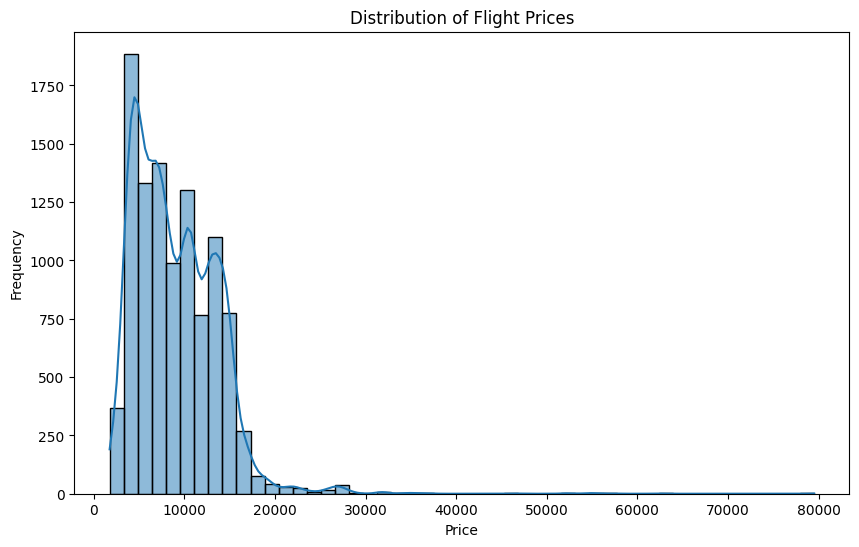

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### Average Price by Airline

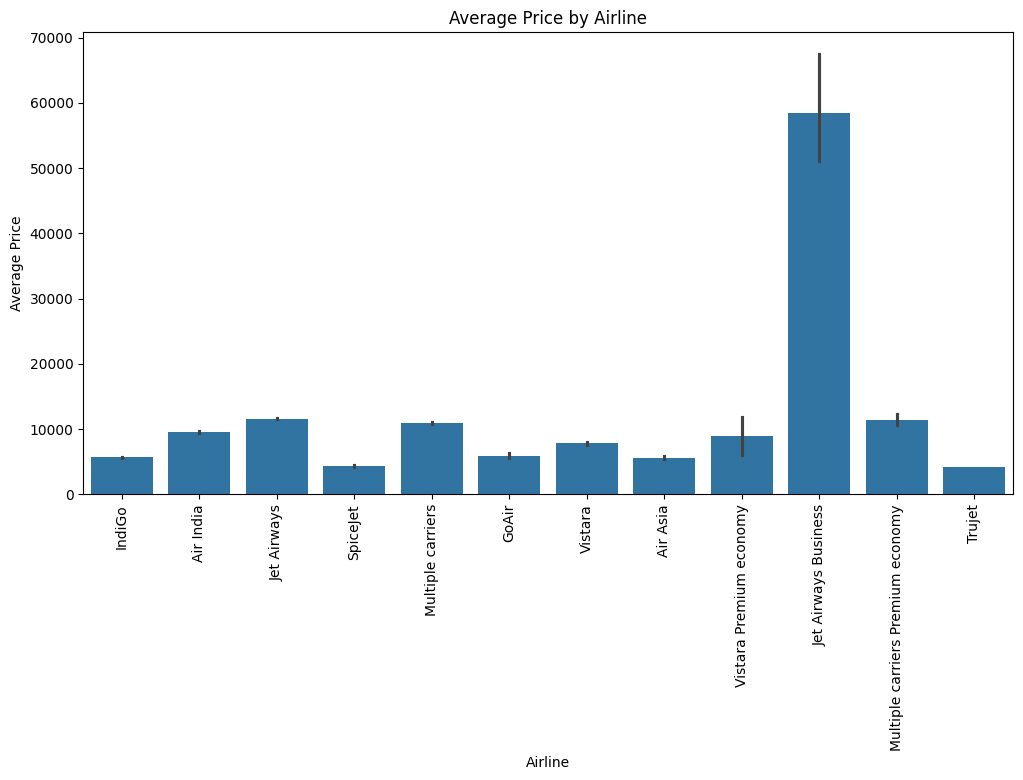

In [56]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Airline', y='Price', data=df, estimator=np.mean)
plt.title('Average Price by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

### Most Number of Flight

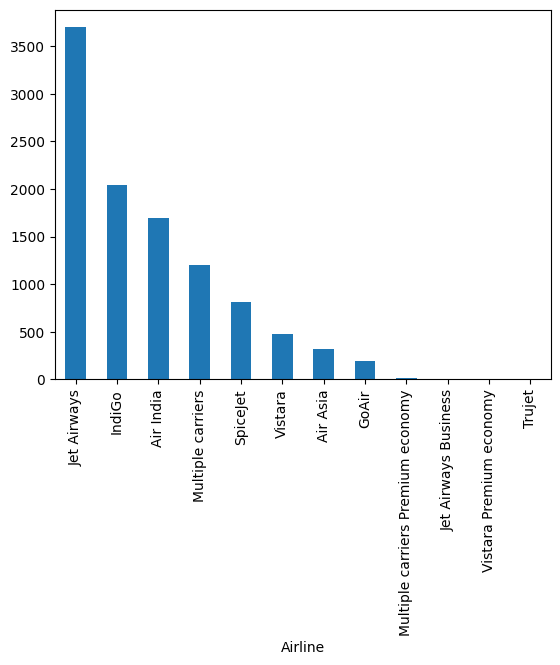

In [70]:
df['Airline'].value_counts().plot(kind = 'bar')
plt.show()

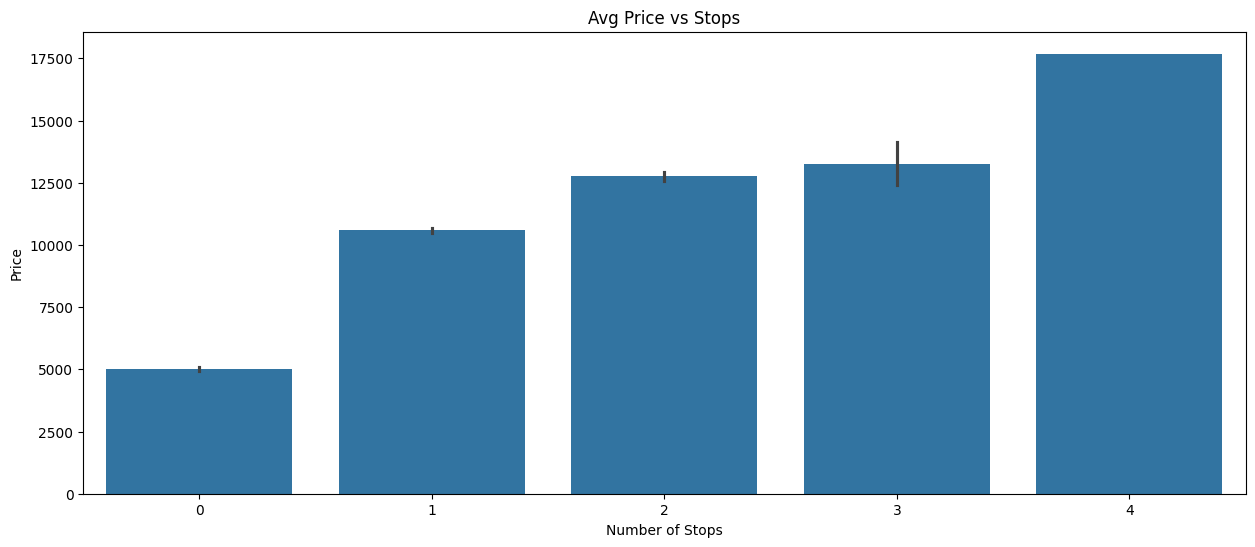

In [90]:
fig, axes = plt.subplots(figsize=(15, 6))
sns.barplot(x='Total_Stops',y='Price',estimator=np.mean, data=df)
plt.title("Avg Price vs Stops")
plt.xlabel("Number of Stops")
plt.ylabel('Price')

plt.show()


ValueError: 'locs' must be 1D with shape (N,), but your input has shape ()

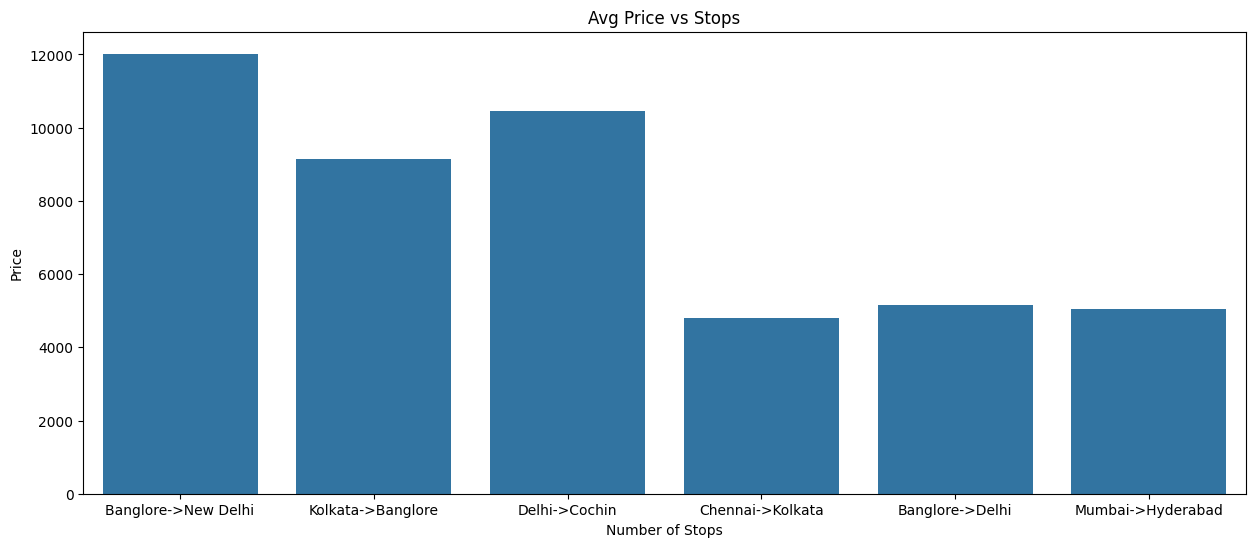

In [98]:
fig, axes = plt.subplots(figsize=(15, 6))
sns.barplot(x='routes',y='Price',estimator=np.mean, data=df, ci=None)
plt.title("Avg Price vs Stops")
plt.xlabel("Number of Stops")
plt.ylabel('Price')
plt.show()